<a href="https://colab.research.google.com/github/onseventhflow/breast-cancer-prediction/blob/main/Breast_Cancer_Prediction(Binary_Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Breast Cancer Prediction using Neural Networks

In [2]:
#import Libraries

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models

The Breast Cancer dataset from Scikit-Learn contains 569 samples with 30 numerical features extracted
from digitized images of breast mass tumors. The goal is to classify tumors as malignant (1) or benign (0)
based on these features. The dataset was originally curated from the Wisconsin Diagnostic Breast Cancer (WDBC)
dataset and is commonly used for binary classification tasks in machine learning.


In [3]:
# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target   # Features and labels

In [4]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [5]:

# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [6]:
# Build model
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')   # Binary classification
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Compile model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [8]:
# Train model
history = model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test)
)

Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6579 - loss: 0.5996 - val_accuracy: 0.9298 - val_loss: 0.3684
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9040 - loss: 0.3505 - val_accuracy: 0.9561 - val_loss: 0.2310
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9419 - loss: 0.2104 - val_accuracy: 0.9561 - val_loss: 0.1549
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9330 - loss: 0.1769 - val_accuracy: 0.9561 - val_loss: 0.1178
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9416 - loss: 0.1452 - val_accuracy: 0.9649 - val_loss: 0.0994
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9702 - loss: 0.1229 - val_accuracy: 0.9649 - val_loss: 0.0896
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9650 - loss: 0.0997 - val_accuracy: 0.9649 - val_loss: 0.0834
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9759 - loss: 0.0803 - val_accuracy: 0.9649 - val_lo

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9651 - loss: 0.0877 
Test Accuracy: 96.49%


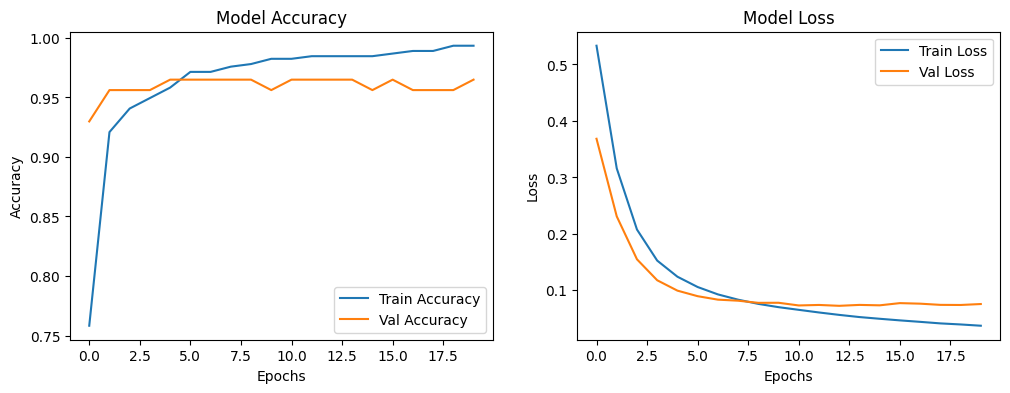

In [10]:
# Evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Plot accuracy and loss using Matplotlib
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()

In [9]:
#Get probability output from model
y_pred_prob = model.predict(X_test)

#Convert probability to binary output (0 or 1)
y_pred = (y_pred_prob >= 0.5).astype(int)

#Print results in human-readable form
for i in range(6):  # first 6 samples
    prob = y_pred_prob[i][0]

    if y_pred[i][0] == 1:
        prediction = "Malignant"
    else:
        prediction = "Benign"

    actual = "Malignant" if y_test[i] == 1 else "Benign"

    print(f"Sample {i+1}: Probability = {prob:.2f} | Predicted = {prediction} | Actual = {actual}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Sample 1: Probability = 0.93 | Predicted = Malignant | Actual = Malignant
Sample 2: Probability = 0.00 | Predicted = Benign | Actual = Benign
Sample 3: Probability = 0.00 | Predicted = Benign | Actual = Benign
Sample 4: Probability = 1.00 | Predicted = Malignant | Actual = Malignant
Sample 5: Probability = 1.00 | Predicted = Malignant | Actual = Malignant
Sample 6: Probability = 0.00 | Predicted = Benign | Actual = Benign
